# Project: Wrangling and Analyze Data

## Table of contents : 

*  [Introduction](#Introduction) 

* [Data Gathering](#Datagather)

* [Assessing Data](#assess)

* [Cleaning Data](#clean)

* [Storing Data](#store)

* [Analyzing and Visualizing Data](#analyze)

* [Conclusion](#conclusion)

* [Resources](#resource)


## Introduction  <a id="Introduction"></a> 

The dataset that we are working on it is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. In this project we will gather the data from different sources and format then assess the data visually and programmatically and documenting each quality and tidiness issues, after that cleaning these issues by defining them first then write the code to clean and test. By the end, we will start analyzing and display our visualization and communicate our insights.

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
import requests
import os
import json

## Data Gathering <a id="Datagather"></a> 
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [3]:
archieve_df = pd.read_csv('twitter-archive-enhanced.csv')

In [4]:
archieve_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [5]:
url = ' https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [6]:
with open('image_predictions.tsv', mode = 'wb') as file:
    file.write(response.content)

In [7]:
images_df = pd.read_csv('image_predictions.tsv', sep='\t')

In [8]:
images_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [ ]:
import tweepy
from tweepy import OAuthHandler
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = archieve_df.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [9]:
df_list = []

with open('tweet_json.txt') as file:
    for line in file:
        
        df_list.append(json.loads(line))

In [10]:
tweet_counts_df = pd.DataFrame(df_list, columns = ['id',
                                          'retweet_count',
                                           'favorite_count'])

In [11]:
tweet_counts_df.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


## Assessing Data <a id="assess"></a>
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

In [12]:
archieve_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [13]:
images_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [14]:
tweet_counts_df

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


In [15]:
archieve_df.info() # to assess the completeness , data type and columns names

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [16]:
images_df.info() # to assess the completeness , data type and columns names

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [17]:
tweet_counts_df.info() # to assess the completeness , data type and columns names

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [18]:
archieve_df.duplicated().sum() # to check if there is a duplicated rows

0

In [19]:
images_df.duplicated().sum() # to check if there is a duplicated rows

0

In [20]:
tweet_counts_df.duplicated().sum() # to check if there is a duplicated rows

0

In [26]:
archieve_df.tweet_id.duplicated().sum() # to check if there is a duplicated tweet_id

0

In [27]:
images_df.tweet_id.duplicated().sum() # to check if there is a duplicated tweet_id

0

In [28]:
tweet_counts_df.id.duplicated().sum() # to check if there is a duplicated tweet_id

0

In [29]:
images_df.jpg_url.duplicated().sum() # to check if there is a duplicated jpg url

66

In [30]:
archieve_df.rating_denominator.value_counts() # check the value counts of the rating denominator

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [31]:
archieve_df[archieve_df.rating_denominator != 10]['rating_denominator'].count() #  counting the number of non 10 denominator

23

### Quality issues
1.  Not all the rows are original tweet, there are 181 retweet and 78 replies.


2.  tweet_counts_df has inconsistent id column with the other tables.


3. archeive_df has a timestamp column with a string data type.


4. There are columns that wont be used in the analysis.


5. there are a naming issues with 'a, an , and ' dog names.


6. There are duplicated images urls.


7. There are 23 rating_denominator does not equal 10 . 


8. The datatype of tweet_id is integer.

### Tidiness issues
1. Four columns that specify the stage of each dog. 


2. all tabels should be in one dataset.

## Cleaning Data <a id="clean"></a>
In this section, clean **all** of the issues you documented while assessing. 


In [32]:
# Make copies of original pieces of data
archieve_clean_df = archieve_df.copy()
images_clean_df = images_df.copy()
tweet_counts_clean_df  = tweet_counts_df.copy()

## Quality issues

###  1. Not all the rows are original tweet, there are 181 retweet and 78 replies.

#### Define: 
Delete the retweet rows in the archieve_clean_df table and keep only the orginal tweet 

#### Code

In [33]:
archieve_clean_df = archieve_clean_df[pd.isnull(archieve_clean_df.retweeted_status_user_id)] # remove the retweet rows
archieve_clean_df = archieve_clean_df[pd.isnull(archieve_clean_df.in_reply_to_status_id)]  # remove the reply rows

#### Test

In [34]:
archieve_clean_df.retweeted_status_user_id.count()

0

In [37]:
archieve_clean_df.in_reply_to_status_id.count()

0

### 2. tweet_counts_df has inconsistent id column name with the other tables

#### Define:
Rename the id column to (tweet_id) to be consistent with other tables.

#### Code

In [38]:
tweet_counts_clean_df  = tweet_counts_clean_df.rename(columns = {'id': 'tweet_id'}) # rename the id column 

#### Test

In [39]:
tweet_counts_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


### 3. archeive_clean_df has a timestamp column with a string data type.

#### Define: Change the data type of 'timestamp' column to a datetime datatype

#### Code

In [40]:
archieve_clean_df.timestamp = pd.to_datetime(archieve_clean_df.timestamp) #change datatype of timestamp column to datetime

#### test

In [41]:
archieve_clean_df.info() # check that the data type changed succcessfuly 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null datetime64[ns]
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: datetime64[ns](1), float

### 4. There are columns that wont be used in the analysis.


#### Define: drop the columns that we dont need it 

#### Code

In [42]:
archieve_clean_df.drop(['in_reply_to_status_id',
                                             'in_reply_to_user_id',
                                             'source',
                                             'retweeted_status_id',
                                             'retweeted_status_user_id',
                                             'retweeted_status_timestamp',
                                              'expanded_urls'], axis = 1 , inplace = True) # drop the columns 

#### test

In [43]:
list(archieve_clean_df) # list the columns of the dataframe

['tweet_id',
 'timestamp',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

In [44]:
archieve_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null datetime64[ns]
text                  2097 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 180.2+ KB


### 5. Naming issues with ( none , a, an , and ) dog names.


#### Define: Replace the invalid dog names with a null (NaN) , also ' None ' since  it does not consider a null value.

#### Code

In [45]:
archieve_clean_df.name = archieve_clean_df.name.replace(regex = ['^[a-z]+','None'], value =np.nan) #replace them with a null

#### test

In [46]:
archieve_clean_df.name.value_counts()

Lucy              11
Charlie           11
Cooper            10
Oliver            10
Tucker             9
Penny              9
Lola               8
Sadie              8
Winston            8
Daisy              7
Toby               7
Bo                 6
Oscar              6
Jax                6
Bella              6
Stanley            6
Bailey             6
Koda               6
Leo                5
Buddy              5
Chester            5
Louis              5
Dave               5
Bentley            5
Scout              5
Milo               5
Rusty              5
Bear               4
Dexter             4
Alfie              4
                  ..
Alexander          1
Michelangelope     1
Mo                 1
Willy              1
Brutus             1
Covach             1
Margo              1
Logan              1
Leela              1
Mauve              1
Clyde              1
Moofasa            1
Katie              1
Tango              1
Pete               1
Rey                1
Bloo         

### 6.  Duplicated images urls.


#### Define: drop the duplictaed images url columns.

#### Code

In [47]:
images_clean_df = images_clean_df.drop_duplicates(subset= ['jpg_url'], keep = 'last') # drop the duplicated jpg url

#### test

In [48]:
images_clean_df.jpg_url.duplicated().sum() # check if they are deleted 

0

### 7. There are 23 rating_denominator does not equal 10 . 


#### Define: drop these 23 records, so that it doesnt effect the analysis.  

#### Code

In [49]:
archieve_clean_df = archieve_clean_df.drop(archieve_clean_df[archieve_clean_df.rating_denominator != 10].index )

#### test

In [50]:
archieve_clean_df.rating_denominator.value_counts()

10    2080
Name: rating_denominator, dtype: int64

### 8. The datatype of tweet_id is integer.


#### Define: change the dataype of the tweet_id column to a string and apply it to all the tables.

#### Code

In [51]:
# convert the data type of tweet_id column to a string 
archieve_clean_df.tweet_id = archieve_clean_df.tweet_id.astype('object')
images_clean_df.tweet_id = images_clean_df.tweet_id.astype('object')
tweet_counts_clean_df.tweet_id = tweet_counts_clean_df.tweet_id.astype('object')

#### test

In [52]:
archieve_clean_df.info() # check that tweet_id type has changed successfully

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2080 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2080 non-null object
timestamp             2080 non-null datetime64[ns]
text                  2080 non-null object
rating_numerator      2080 non-null int64
rating_denominator    2080 non-null int64
name                  1387 non-null object
doggo                 2080 non-null object
floofer               2080 non-null object
pupper                2080 non-null object
puppo                 2080 non-null object
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 178.8+ KB


In [53]:
images_clean_df.info() # check that tweet_id type has changed successfully

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2009 non-null object
jpg_url     2009 non-null object
img_num     2009 non-null int64
p1          2009 non-null object
p1_conf     2009 non-null float64
p1_dog      2009 non-null bool
p2          2009 non-null object
p2_conf     2009 non-null float64
p2_dog      2009 non-null bool
p3          2009 non-null object
p3_conf     2009 non-null float64
p3_dog      2009 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 162.8+ KB


In [54]:
tweet_counts_clean_df.info()  # check that tweet_id type has changed successfully

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null object
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


## Tidiness issues

### 1. Four columns that specify the stage of each dog. 


#### Define: Using a melt function to combine the four cloumns into one 'stage' column.

#### Code

In [55]:
archieve_clean_df = pd.melt(archieve_clean_df, id_vars =['tweet_id','timestamp','text','rating_numerator',
                                                         'rating_denominator','name'] , var_name = 'stage', value_name = 'dog_stage')

In [56]:
archieve_clean_df = archieve_clean_df.drop('stage', axis = 1) # drop the stage column


#### test

In [57]:
archieve_clean_df.dog_stage.value_counts()

None       7973
pupper      230
doggo        83
puppo        24
floofer      10
Name: dog_stage, dtype: int64

### 2. all tabels should be in one dataset.


#### Define: merge all the tables into one table. 

#### Code

In [58]:
# merge the two tables to the cleand archieve dataframe 
archieve_clean_df = pd.merge(archieve_clean_df, images_clean_df , on = 'tweet_id', how = 'left')
archieve_clean_df = pd.merge(archieve_clean_df, tweet_counts_clean_df, on = 'tweet_id', how = 'left')

#### test

In [59]:
archieve_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8320 entries, 0 to 8319
Data columns (total 20 columns):
tweet_id              8320 non-null object
timestamp             8320 non-null datetime64[ns]
text                  8320 non-null object
rating_numerator      8320 non-null int64
rating_denominator    8320 non-null int64
name                  5548 non-null object
dog_stage             8320 non-null object
jpg_url               7552 non-null object
img_num               7552 non-null float64
p1                    7552 non-null object
p1_conf               7552 non-null float64
p1_dog                7552 non-null object
p2                    7552 non-null object
p2_conf               7552 non-null float64
p2_dog                7552 non-null object
p3                    7552 non-null object
p3_conf               7552 non-null float64
p3_dog                7552 non-null object
retweet_count         8320 non-null int64
favorite_count        8320 non-null int64
dtypes: datetime64[ns](1)

In [60]:
archieve_clean_df.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8853,39467
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964,42908
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,12,10,Franklin,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774,41048


## Storing Data <a id="store"></a>

In [61]:
archieve_clean_df.to_csv('twitter_archive_master.csv', index = False, encoding = 'utf-8')

## Analyzing and Visualizing Data <a id="analyze"></a>
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [62]:
# importing the dataset
master_archieve = pd.read_csv('twitter_archive_master.csv')

In [63]:
master_archieve.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8853,39467
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964,42908
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,12,10,Franklin,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774,41048


## 1. Is there a relationship between the number of retweet and number of favorite ?

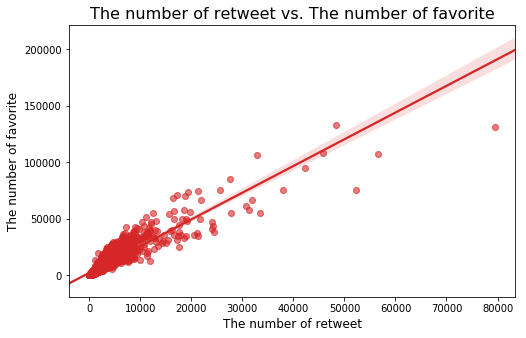

In [64]:
plt.figure(figsize = [8,5])
color = sb.color_palette()[3]
sb.regplot(data = master_archieve , x = 'retweet_count', y = 'favorite_count', color = color, scatter_kws = {'alpha':1/5});
plt.title('The number of retweet vs. The number of favorite', fontsize = 16);
plt.xlabel('The number of retweet', fontsize = 12);
plt.ylabel('The number of favorite', fontsize = 12);

As it shown from the graph above, there is a positive relationship between the number of retweets and favorite.

## 2. Which dog stage was the most common one ? 

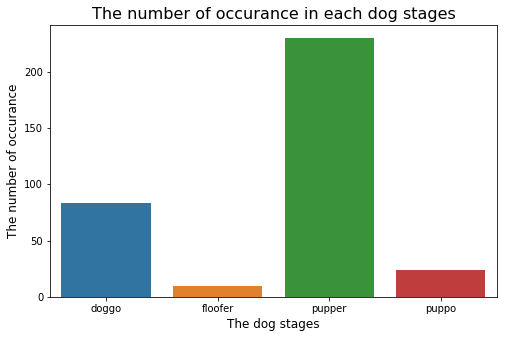

In [65]:
plt.figure(figsize = [8,5])
master_archieve_sub = master_archieve.loc[master_archieve['dog_stage'] != 'None'] # to not include the None values

sb.countplot(data = master_archieve_sub , x = 'dog_stage');
plt.title('The number of occurance in each dog stages', fontsize = 16);
plt.xlabel('The dog stages', fontsize = 12);
plt.ylabel('The number of occurance', fontsize = 12);

As it show in the chart above, the 'pupper' was the most common dog stage in these tweets and the 'doggo' comes after it.While 'floofer' was the lowest.

## 3. is the stage of the dog affect the number of favorites received ?

(0, 50000)

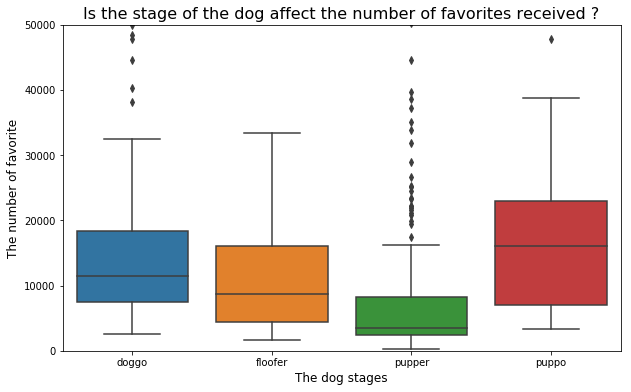

In [66]:
plt.figure(figsize = [10,6])
sb.boxplot(data = master_archieve_sub , x = 'dog_stage', y = 'favorite_count')
plt.title('Is the stage of the dog affect the number of favorites received ?',  fontsize = 16)
plt.xlabel('The dog stages', fontsize = 12);
plt.ylabel('The number of favorite', fontsize = 12)
plt.ylim((0,50000)) # axis limit 

As it show in the chart above, the 'puppo' stage has the highest number of favorites , while 'pupper' has the lowest.

## 4. is the stage of the dog affect the number of retweets received ?

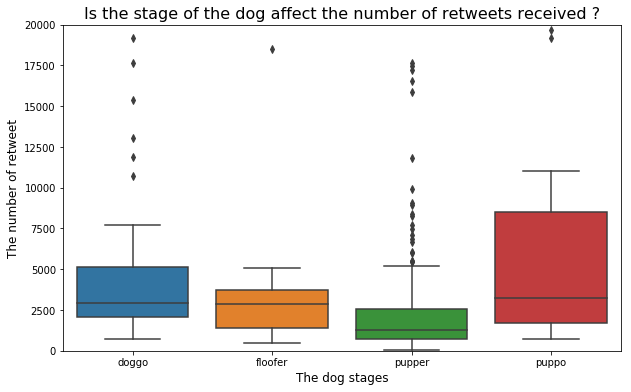

In [67]:
plt.figure(figsize = [10,6]);
sb.boxplot(data = master_archieve_sub , x = 'dog_stage', y = 'retweet_count')
plt.title('Is the stage of the dog affect the number of retweets received ?',  fontsize = 16)
plt.xlabel('The dog stages', fontsize = 12);
plt.ylabel('The number of retweet', fontsize = 12)
plt.ylim((0,20000)); # axis limit 

As it show in the chart above, similar to the pervious chart the 'puppo' has the heighest number of retweets while 'pupper' has the lowest.

## Conclusion <a id="conclusion"></a>

The dataset of WeRateDogs that I have worked in this project, was from the real-world data that helped me to understand the best practices to wrangle and analyze the data set in the real life. Also, it has a lot more to work with and get more meaningful insights.

## Resources  <a id="resource"></a>

- https://seaborn.pydata.org/generated/seaborn.regplot.html
- https://pandas.pydata.org/pandas-docs/version/0.20/generated/pandas.to_datetime.html
- https://stackoverflow.com/questions/42255754/phone-number-should-be-a-string-or-some-numeric-type-that-have-capacity-to-save